## Тема: Обучение без учителя

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
y = pd.DataFrame(target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [13]:
X_train_scaled.shape, X_train_tsne.shape

((404, 13), (404, 2))

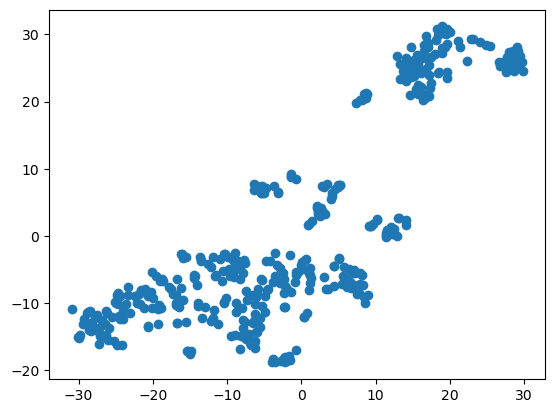

In [14]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

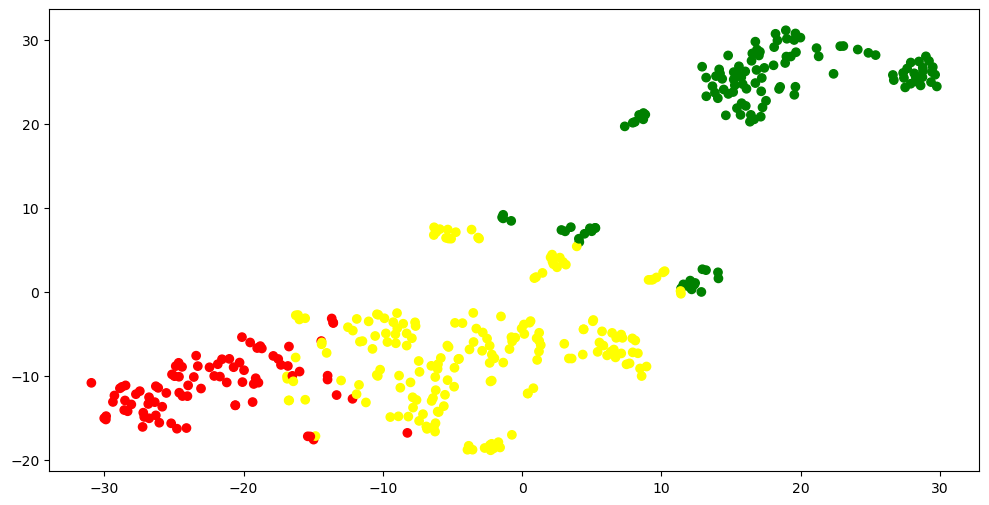

In [15]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

color_map = mcolors.ListedColormap(['red', 'green', 'yellow'])

plt.figure(figsize=[12,6])
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, cmap=color_map)

plt.show()

In [16]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [35]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 27.788372093023252
Кластер 1: 16.165354330708666
Кластер 2: 24.958115183246072


### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [30]:
labels_test = kmeans.predict(X_test_scaled)

In [31]:
print('CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176


In [32]:
print('price:')
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

price:
Кластер 0: 31.35
Кластер 1: 16.437142857142856
Кластер 2: 21.860784313725492
